<a href="https://colab.research.google.com/github/yuukionna022/ComputerVisionFontsExtended/blob/yuki/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Font Classification Using YOLO <b> </h1></center>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing required Libraries

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

# Dataset Description






In [ ]:
#run to get dataset
data_dir = '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset' #replace with directory to dataset

Database that we used: https://www.kaggle.com/datasets/frobert/font-from-image

Link to the whole dataset:

Images we added:

## Heirarchy of folders correction and preprocessing

In [ ]:
val_dir = '/content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val'
train_dir = '/content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/train'
test_dir = '/content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test'

Defining paths to train and test folders.

In [ ]:
#set the paths to labels and images directory
label_dir= "/content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/lables"
image_dir="/content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images"

In [ ]:
#get list of all class names and put into an array
classList = os.listdir(data_dir)

classList

['Steppes TT',
 'Nasalization',
 'News Gothic',
 'Rockwell',
 'Times New Roman',
 'Snowdrift Regular',
 'Verdana',
 'Palatino linotype',
 'Sabon',
 'Perpetua',
 'Myriad',
 'Monotype Corsiva',
 'Helvetica',
 'Lucida Bright',
 'LCD Mono',
 'Georgia',
 'Gill sans',
 'Minion',
 'Hombre',
 'Mrs Eaves',
 'Courier',
 'Didot',
 'Frutiger',
 'Consolas',
 'Futura',
 'Garamond',
 'Fascinate',
 'Franklin Gothic',
 'Corbel',
 'Elephant',
 'Cambria',
 'Calibry',
 'Comic Sans MS',
 'Calligraphy',
 'Century',
 'Book Antiqua',
 'Calvin',
 'Candara',
 'Brandish',
 'Californian FB',
 'Agency',
 'Algerian',
 'Akzidenz Grotesk',
 'Bell MT',
 'Bembo',
 'Arial',
 'Bodoni',
 'Baskerville']

Making directories according to above struture of folders

In [ ]:
#import os
#run it once for making directories

#os.makedirs('/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val')

In [ ]:
#create folders inside train/test/val to label data
for item in classList:
  os.makedirs('/content/drive/MyDrive/IAT 360/Final Project/Font Project/images/train' + item)
  os.makedirs('/content/drive/MyDrive/IAT 360/Final Project/Font Project/images/val' + item)
  # print('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/' + item)

In [ ]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/*/*"):
        file_name=os.path.basename(file)
        font_name=os.path.basename(os.path.dirname(file))
        font_image = (file)
        X.append(font_image)
        y.append(font_name)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{24102} samples',end=' ')
        # print(font_image)
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [ ]:
font_image, font_name = load_data()

 Processed 24100/24102 samples 

In [ ]:
font_image

array(['/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Steppes TT/Image_10.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Steppes TT/Image_1.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Steppes TT/Image_100.jpg',
       ...,
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Baskerville/Image_403.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Baskerville/Image_494.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Baskerville/Image_450.jpg'],
      dtype='<U89')

In [ ]:
font_name

array(['Steppes TT', 'Steppes TT', 'Steppes TT', ..., 'Baskerville',
       'Baskerville', 'Baskerville'], dtype='<U17')

In [ ]:
from sklearn.model_selection import train_test_split

#splitting our data
############# Unscaled test/train set #############
X_train80, X_test, y_train80, y_test = train_test_split(
    font_image,
    font_name,
    test_size=0.2,
    random_state=42
)

# Then further divide the train set into validation
# Note that here, to get 60%-20%, we'll need to divide the 80% train set from above to 75-25 split
# 0.8 * 0.25 = 0.2
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train80,
    y_train80,
    test_size=0.25,
    random_state=42
)

In [ ]:
X_train80

array(['/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Courier/Image_388.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Helvetica/Image_337.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Bembo/Image_394.jpg',
       ...,
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Steppes TT/Image_405.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Calibry/Image_367.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Baskerville/Image_308.jpg'],
      dtype='<U89')

In [ ]:
X_test

array(['/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Rockwell/Image_66.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Gill sans/Image_309.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Agency/Image_186.jpg',
       ...,
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Baskerville/Image_455.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Garamond/Image_174.jpg',
       '/content/drive/MyDrive/IAT 360/Final Project/Font Dataset/Californian FB/Image_313.jpg'],
      dtype='<U89')

In [ ]:
y_train80

array(['Courier', 'Helvetica', 'Bembo', ..., 'Steppes TT', 'Calibry',
       'Baskerville'], dtype='<U17')

In [ ]:
y_test

array(['Rockwell', 'Gill sans', 'Agency', ..., 'Baskerville', 'Garamond',
       'Californian FB'], dtype='<U17')

Copy png files from the train folder to the folders created.

In [ ]:
import shutil
import os
from PIL import Image

# run it once for copying!
for file in X_train80:
    #going through the training data and forming the directory
    if file.endswith(".jpg") or file.endswith(".png"): # Corrected the condition
        #'file' is the whole directory
        image = Image.open(file)
        image = image.convert("RGB")
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        # Extract the class name (assumes class name is the parent directory of the file)
        className = os.path.basename(os.path.dirname(file))

        # Ensure the class directory exists in the output directory
        class_dir = os.path.join(train_dir, className) # Create the class directory path
        os.makedirs(class_dir, exist_ok=True) # Create the directory if it doesn't exist

        # Save the image in the class directory with the same file name
        image.save(os.path.join(class_dir, new_filename), "JPEG") # Save to the created directory
        print(f"Saved: {os.path.join(class_dir, new_filename)}")

Streaming output truncated to the last 5000 lines.
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/train/Agency/Image_445.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/train/Calligraphy/Image_46.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/train/Garamond/Image_264.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/train/Consolas/Image_415.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/train/Comic Sans MS/Image_223.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/train/Hombre/Image_456.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/train/Bell MT/Image_323.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/train/Helvetica/Image_295.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Projec

In [ ]:
import shutil
import os
import PIL
from PIL import Image

# run it once for copying!
for file in X_validation:
    #going through the training data and forming the directory
    if file.endswith(".jpg") or file.endswith(".png"): # Corrected the condition
        #'file' is the whole directory
        try:
            image = Image.open(file)
            image = image.convert("RGB")
        except PIL.UnidentifiedImageError:
            print(f"Skipping file {file}: Could not open or convert.")
            continue  # Skip to the next file
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        # Extract the class name (assumes class name is the parent directory of the file)
        className = os.path.basename(os.path.dirname(file))

        # Ensure the class directory exists in the output directory
        class_dir = os.path.join(val_dir, className) # Create the class directory path
        os.makedirs(class_dir, exist_ok=True) # Create the directory if it doesn't exist

        # Save the image in the class directory with the same file name
        image.save(os.path.join(class_dir, new_filename), "JPEG") # Save to the created directory
        print(f"Saved: {os.path.join(class_dir, new_filename)}")

Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val/Century/Image_493.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val/Courier/Image_7.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val/Perpetua/Image_195.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val/Calvin/Image_261.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val/Frutiger/Image_152.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val/Comic Sans MS/Image_76.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val/Frutiger/Image_172.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val/Mrs Eaves/Image_265.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/val/Gill sans/Image_419.jpg
Saved: /co

In [ ]:
import shutil
import os
import PIL
from PIL import Image

# run it once for copying!
for file in X_test:
    #going through the training data and forming the directory
    if file.endswith(".jpg") or file.endswith(".png"): # Corrected the condition
        #'file' is the whole directory
        try:
            image = Image.open(file)
            image = image.convert("RGB")
        except PIL.UnidentifiedImageError:
            print(f"Skipping file {file}: Could not open or convert.")
            continue  # Skip to the next file
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        # Extract the class name (assumes class name is the parent directory of the file)
        className = os.path.basename(os.path.dirname(file))

        # Ensure the class directory exists in the output directory
        class_dir = os.path.join(test_dir, className) # Create the class directory path
        os.makedirs(class_dir, exist_ok=True) # Create the directory if it doesn't exist

        # Save the image in the class directory with the same file name
        image.save(os.path.join(class_dir, new_filename), "JPEG") # Save to the created directory
        print(f"Saved: {os.path.join(class_dir, new_filename)}")

Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test/Mrs Eaves/Image_366.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test/Courier/Image_2.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test/Frutiger/Image_161.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test/Algerian/Image_230.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test/Comic Sans MS/Image_42.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test/Perpetua/Image_253.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test/Bembo/Image_159.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test/Perpetua/Image_383.jpg
Saved: /content/drive/MyDrive/IAT 360/Final Project/Font Project/final_data/images/test/Palatino linotype/Image_3

Visualizing somme pictures from the dataset

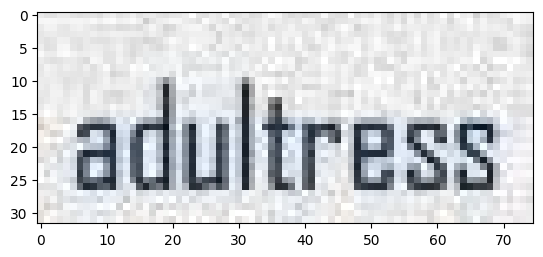

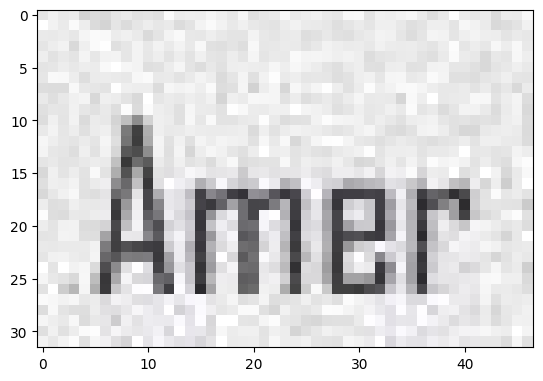

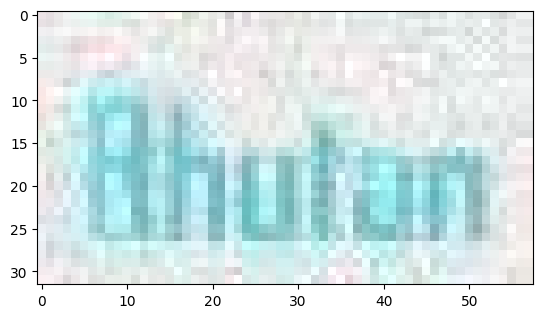

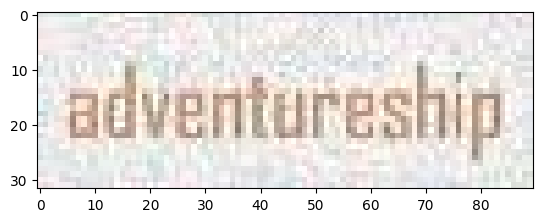

In [ ]:
#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(train_dir, "Agency"))):
    img = cv2.imread(os.path.join(train_dir, "Agency", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [ ]:
#creating dataframe

training_data = []

#loop through all the font folders
for font in os.listdir(train_dir):
  folder = os.path.join(train_dir, font)
  for image in os.listdir(folder):
    training_data.append({'filename':image, 'label':font})

  # print(font + "completed")

#create the dataframe from the data
df = pd.DataFrame(training_data)

df

,filename,label
0,Image_163.jpg,Frutiger
1,Image_166.jpg,Frutiger
2,Image_124.jpg,Frutiger
3,Image_254.jpg,Frutiger
4,Image_450.jpg,Frutiger
...,...,...
19285,Image_443.jpg,Nasalization
19286,Image_70.jpg,Nasalization
19287,Image_485.jpg,Nasalization
19288,Image_37.jpg,Nasalization


In [ ]:
#creating dataframe

val_data = []

#loop through all the font folders
for font in os.listdir(test_dir):
  folder = os.path.join(test_dir, font)
  for image in os.listdir(folder):
    val_data.append({'filename':image, 'label':font})

  # print(font + " completed")

#create the dataframe from the data
df2 = pd.DataFrame(val_data)

df2

,filename,label
0,Image_465.jpg,Consolas
1,Image_179.jpg,Consolas
2,Image_118.jpg,Consolas
3,Image_162.jpg,Consolas
4,Image_232.jpg,Consolas
...,...,...
3566,Image_403.jpg,Akzidenz Grotesk
3567,Image_357.jpg,Akzidenz Grotesk
3568,Image_107.jpg,Akzidenz Grotesk
3569,Image_200.jpg,Akzidenz Grotesk


In [ ]:
#checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19290 entries, 0 to 19289
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  19290 non-null  object
 1   label     19290 non-null  object
dtypes: object(2)
memory usage: 301.5+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2350 non-null   object
 1   label     2350 non-null   object
dtypes: object(2)
memory usage: 36.8+ KB


In [ ]:
print(df['label'].unique())
print(df2['label'].unique())

['Frutiger' 'Sabon' 'Futura' 'Myriad' 'Akzidenz Grotesk' 'Book Antiqua'
 'Hombre' 'Consolas' 'Verdana' 'Calligraphy' 'Californian FB' 'Georgia'
 'Candara' 'Baskerville' 'Franklin Gothic' 'Times New Roman' 'Agency'
 'Century' 'Snowdrift Regular' 'Corbel' 'Minion' 'Monotype Corsiva'
 'Perpetua' 'Didot' 'Courier' 'Cambria' 'Fascinate' 'Bembo' 'Steppes TT'
 'Gill sans' 'Mrs Eaves' 'Elephant' 'Comic Sans MS' 'Palatino linotype'
 'Bodoni' 'Rockwell' 'News Gothic' 'Brandish' 'LCD Mono' 'Bell MT'
 'Helvetica' 'Garamond' 'Arial' 'Algerian' 'Calvin' 'Lucida Bright'
 'Calibry' 'Nasalization']
['Consolas' 'Mrs Eaves' 'Franklin Gothic' 'Lucida Bright' 'Corbel'
 'Fascinate' 'Hombre' 'Steppes TT' 'Myriad' 'Calibry' 'Frutiger' 'Futura'
 'Comic Sans MS' 'Georgia' 'Monotype Corsiva' 'Snowdrift Regular'
 'Elephant' 'Rockwell' 'Nasalization' 'Helvetica' 'Times New Roman'
 'Sabon' 'LCD Mono' 'Perpetua' 'Californian FB' 'Cambria' 'News Gothic'
 'Gill sans' 'Palatino linotype' 'Minion' 'Garamond' 'Verdana' '

In [ ]:
label_map = {'Aladin-Regular' : 0,
 'AlexBrush-Regular' : 1,
   'Allura-Regular' : 2,
   'AmaticSC-Regular' : 3,
   'AmericanTypewriter-Condensed': 4,
   'Bonbon-Regular' : 5,
   'BowlbyOneSC-Regular' : 6,
   'BradleyHandITCTT-Bold' : 7,
   'BrushScriptMT' : 8,
   'CarterOne' : 9,
   'Chalkduster' : 10,
   'Cookie-Regular' : 11,
   'Copperplate' : 12,
   'CourierNewPSMT' : 13,
   'Damion' : 14,
   'DancingScript-Bold' : 15,
   'Didot' : 16,
   'FredokaOne-Regular' : 17,
   'Futura-CondensedMedium' : 18,
   'GochiHand-Regular' : 19,
   'GrandHotel-Regular' : 20,
   'GreatVibes-Regular' : 21,
   'Helvetica-Bold' : 22,
   'HelveticaNeue' : 23,
   'Impact' : 24,
   'Luminari-Regular' : 25,
   'MarkerFelt-Thin' : 26,
   'Noteworthy-Light' : 27,
   'Optima-Regular' : 28,
   'Pacifico-Regular' : 29,
   'RockSalt' : 30,
   'Rockwell-Regular' : 31,
   'Shojumaru-Regular' : 32,
   'SwankyandMooMoo' : 33,
   'TimesNewRomanPSMT' : 34,
   'Yesteryear-Regular' : 35,
   'Gopher' : 36}

df['class'] = df['label'].map(label_map)
df2['class'] = df2['label'].map(label_map)

In [ ]:
df2

,filename,label,class
0,Aladin-Regular$$U003f.00000.png,Aladin-Regular,0
1,Aladin-Regular$$U0044.00000.png,Aladin-Regular,0
2,Aladin-Regular$$U0046U0049U0043.00000.png,Aladin-Regular,0
3,Aladin-Regular$$U00c3U00a8.00000.png,Aladin-Regular,0
4,Aladin-Regular$$U0042U0041U0044.00000.png,Aladin-Regular,0
...,...,...,...
2345,Gopher$$1.png,Gopher,36
2346,Gopher$$6.png,Gopher,36
2347,Gopher$$24.png,Gopher,36
2348,Gopher$$42.png,Gopher,36


In [ ]:
df

,filename,label,class
0,Aladin-Regular$$U0048U004fU0055.00000.png,Aladin-Regular,0
1,Aladin-Regular$$U0041U006cU0065.00000.png,Aladin-Regular,0
2,Aladin-Regular$$U0025.00000.png,Aladin-Regular,0
3,Aladin-Regular$$U0036.00000.png,Aladin-Regular,0
4,Aladin-Regular$$U0045U0054U0045.00000.png,Aladin-Regular,0
...,...,...,...
9389,Gopher$$35.png,Gopher,36
9390,Gopher$$3.png,Gopher,36
9391,Gopher$$8.png,Gopher,36
9392,Gopher$$31.png,Gopher,36


In [ ]:
train_df = df.astype(str)
val_df = df2.astype(str)

Only run to create text files for lables

In [ ]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['filename'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.filename == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class'])

#writing on text files
  folder = name.split("$$")[0]
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{folder}/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['filename'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.filename == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class'])

#writing on text files
  folder = name.split("$$")[0]
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{folder}/{name}.txt', 'w') as file:
            file.write(text)

KeyboardInterrupt: 

In [ ]:
#training
print("before deleting (train data): " , df.shape)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("after deleting(train_data): " ,df.shape)

#validation
print("before deleting (val data): " , df2.shape)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)
print("after deleting(val data): " , df2.shape)

print("nothing to remove")

before deleting (train data):  (9394, 3)
after deleting(train_data):  (9394, 3)
before deleting (val data):  (2350, 3)
after deleting(val data):  (2350, 3)
nothing to remove


# Custom font identification using YOLO


First install and import

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

## Training YOLO

In [ ]:
# model = YOLO('yolov8n-cls.pt') #this model is less accurate

model = YOLO('yolov8s-cls.pt')
model2= YOLO('yolov8s-cls.pt')

The detailed architecture of the model can be seen from:


In [ ]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

In [ ]:
%%writefile config.yaml
path: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val

# Classes
nc: 37 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: Aladin-Regular
  1: AlexBrush-Regular
  2: Allura-Regular
  3: AmaticSC-Regular
  4: AmericanTypewriter-Condensed
  5: Bonbon-Regular
  6: BowlbyOneSC-Regular
  7: BradleyHandITCTT-Bold
  8: BrushScriptMT
  9: CarterOne
  10: Chalkduster
  11: Cookie-Regular
  12: Copperplate
  13: CourierNewPSMT
  14: Damion
  15: DancingScript-Bold
  16: Didot
  17: FredokaOne-Regular
  18: Futura-CondensedMedium
  19: GochiHand-Regular
  20: GrandHotel-Regular
  21: GreatVibes-Regular
  22: Helvetica-Bold
  23: HelveticaNeue
  24: Impact
  25: Luminari-Regular
  26: MarkerFelt-Thin
  27: Noteworthy-Light
  28: Optima-Regular
  29: Pacifico-Regular
  30: RockSalt
  31: Rockwell-Regular
  32: Shojumaru-Regular
  33: SwankyandMooMoo
  34: TimesNewRomanPSMT
  35: Yesteryear-Regular
  36: Gopher

Writing config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [ ]:
#classification yolo model does not take yaml files as argument, it uses a directory
# model.train(data="/content/config.yaml", epochs=3,patience=5,batch=8, lr0=0.0005,imgsz=640)

In [ ]:
# the first model:
# model.train(data=data_dir, epochs=3,patience=5,batch=8, lr0=0.0005,imgsz=640)
# the second model:
model2.train(data=data_dir, epochs=3,patience=5,batch=8, lr0=0.0005,imgsz=224)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images, epochs=3, time=None, patience=5, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... 9441 images, 0 corrupt: 100%|██████████| 9441/9441 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... 2361 images, 0 corrupt: 100%|██████████| 2361/2361 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train6
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:06<00:00, 22.31it/s]

                   all      0.813      0.976



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:06<00:00, 21.39it/s]

                   all      0.945      0.989



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:06<00:00, 21.65it/s]

                   all      0.952      0.992



3 epochs completed in 0.039 hours.
Optimizer stripped from runs/classify/train6/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train6/weights/best.pt, 10.3MB

Validating runs/classify/train6/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,122,597 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... found 9441 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... found 2361 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:06<00:00, 21.73it/s]


                   all      0.952      0.991
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train6


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ee812973c10>
curves: []
curves_results: []
fitness: 0.9714103937149048
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.951715350151062, 'metrics/accuracy_top5': 0.9911054372787476, 'fitness': 0.9714103937149048}
save_dir: PosixPath('runs/classify/train6')
speed: {'preprocess': 0.06368724737365283, 'inference': 0.4381899205570956, 'loss': 0.0007855392320334836, 'postprocess': 0.0007562544425631519}
task: 'classify'
top1: 0.951715350151062
top5: 0.9911054372787476

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... found 9441 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... found 2361 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
test: None...


val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... 2361 images, 0 corrupt: 100%|██████████| 2361/2361 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 296/296 [00:12<00:00, 22.82it/s]


                   all      0.947      0.989
Speed: 0.5ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


Showing confusion matrix, that is already stored in detect/train folder

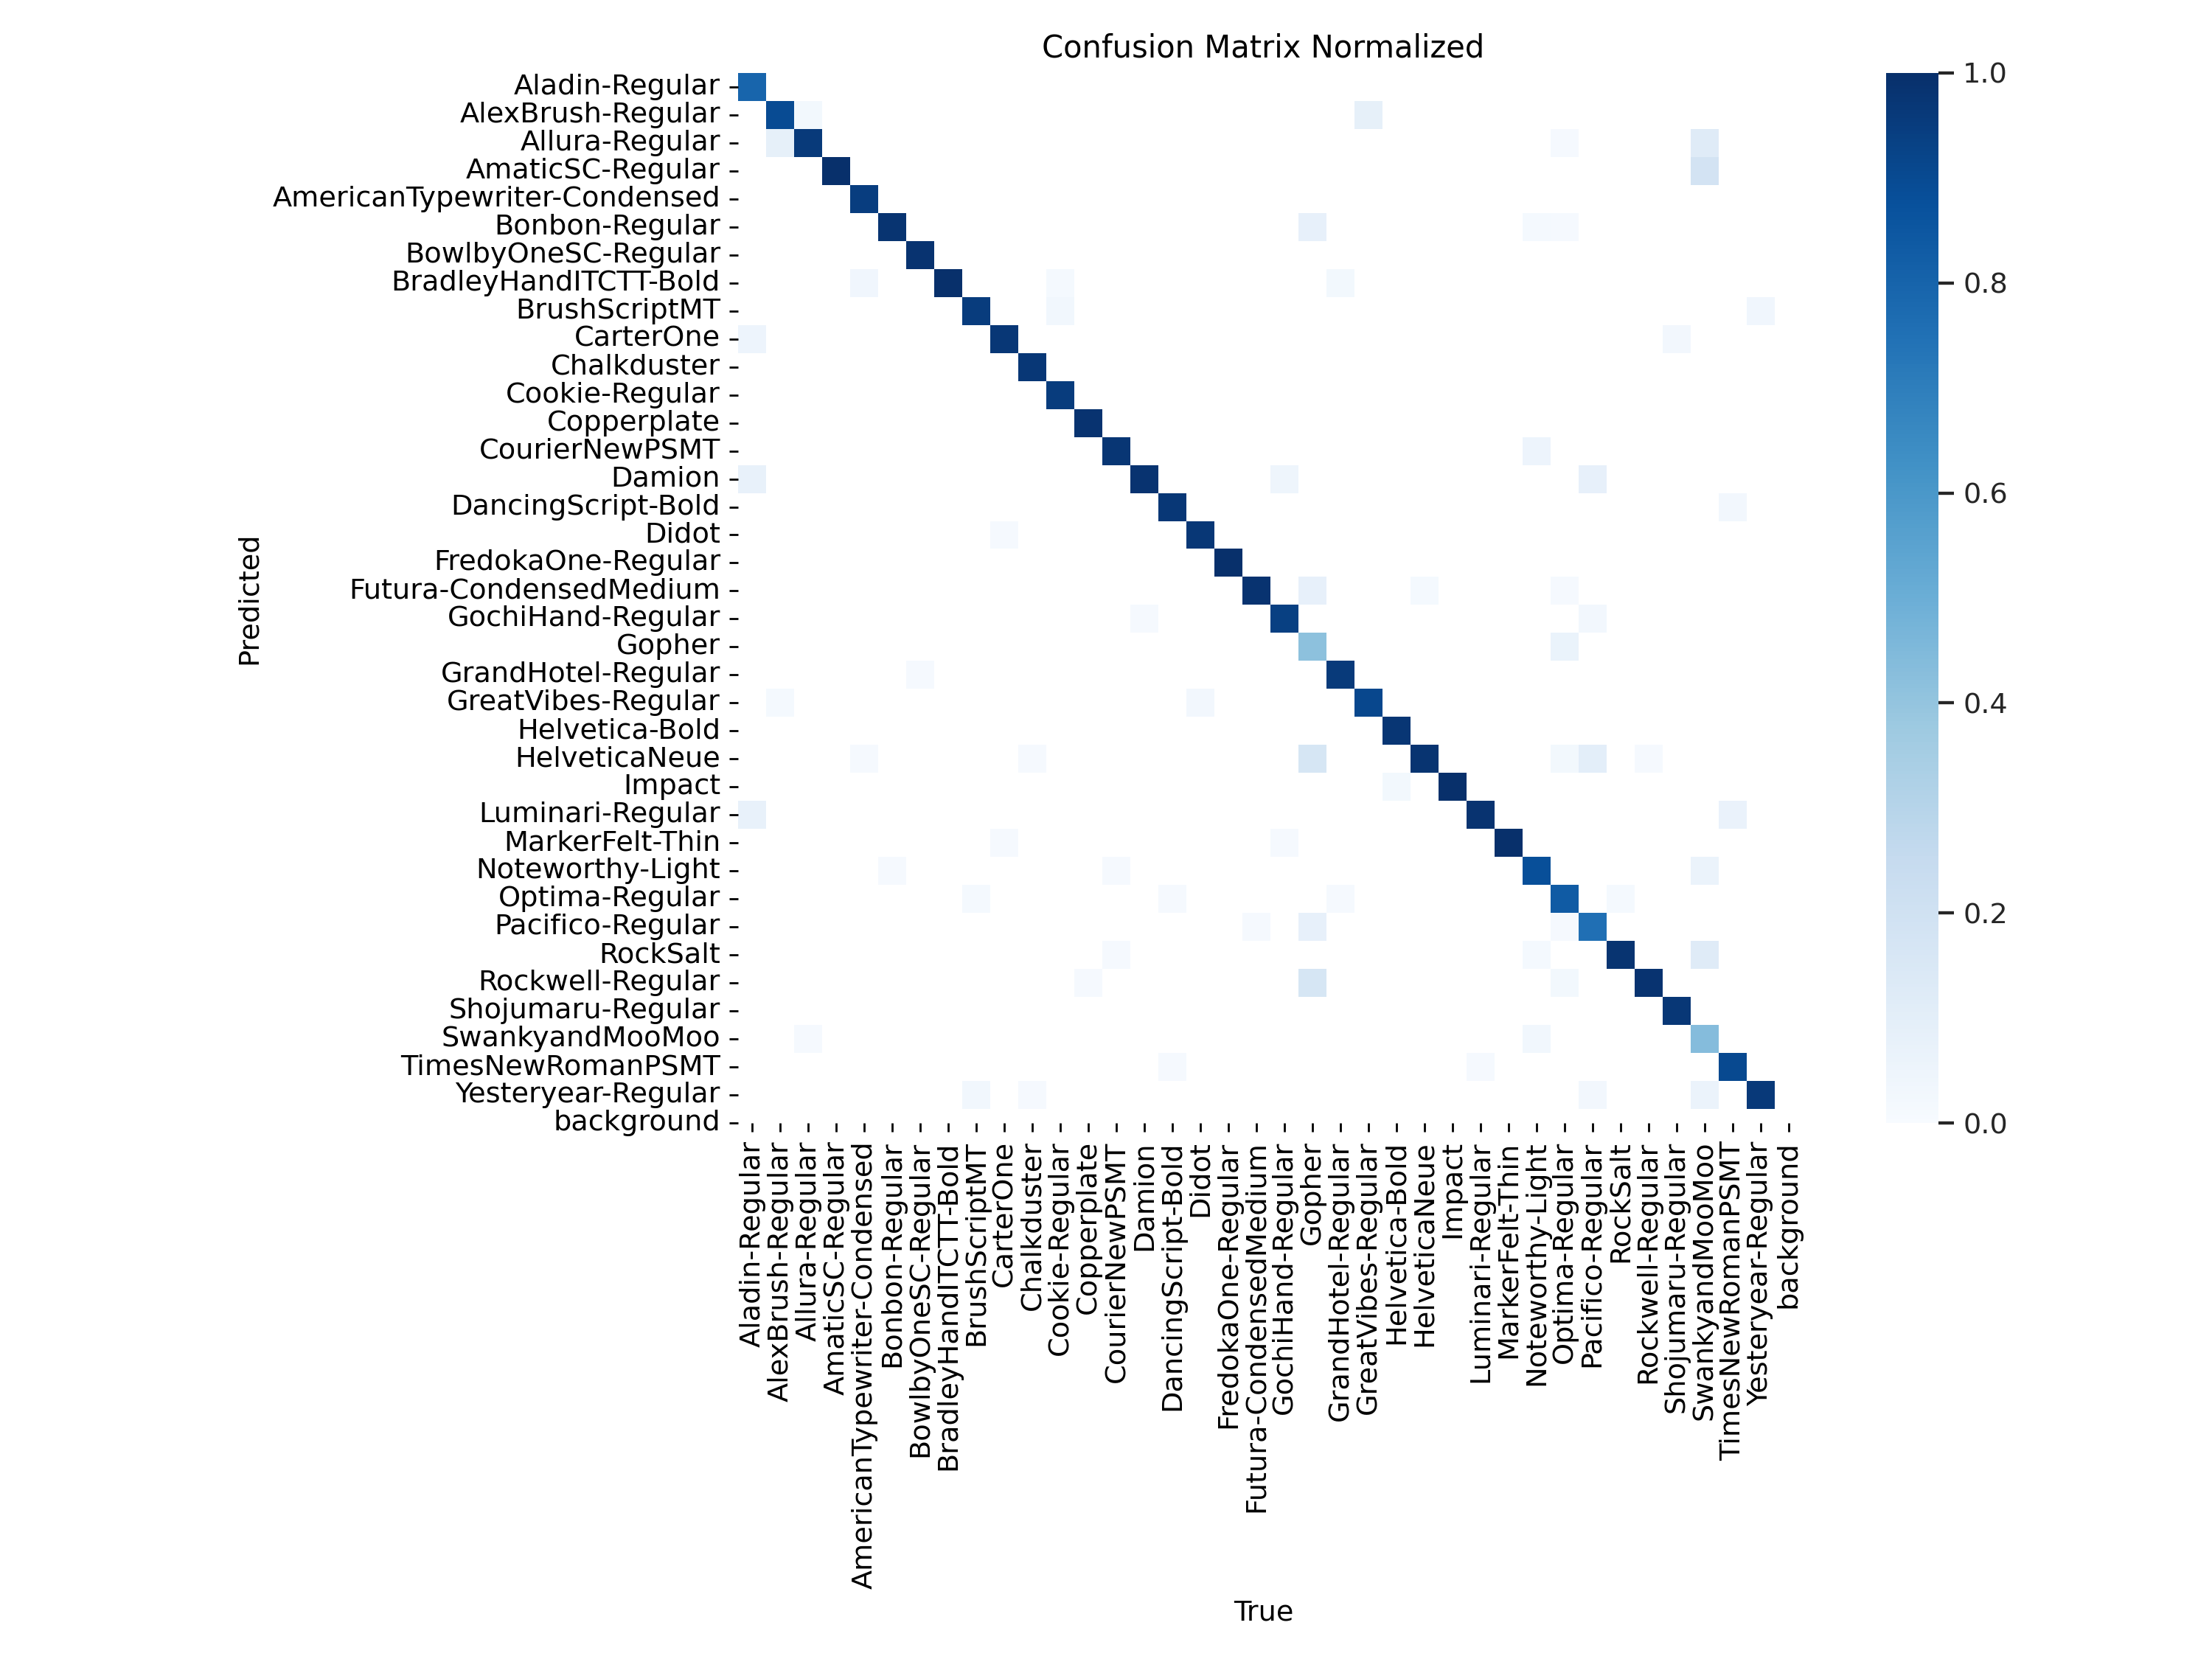

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/classify/train3/confusion_matrix_normalized.png')

##Prediction

In [ ]:
model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png', save=True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png: 640x640 Chalkduster 0.14, BradleyHandITCTT-Bold 0.12, GrandHotel-Regular 0.08, BrushScriptMT 0.05, Yesteryear-Regular 0.05, 3.9ms
Speed: 18.6ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2


Chalkduster 0.14, BradleyHandITCTT-Bold 0.12, GrandHotel-Regular 0.08, BrushScriptMT 0.05, Yesteryear-Regular 0.05


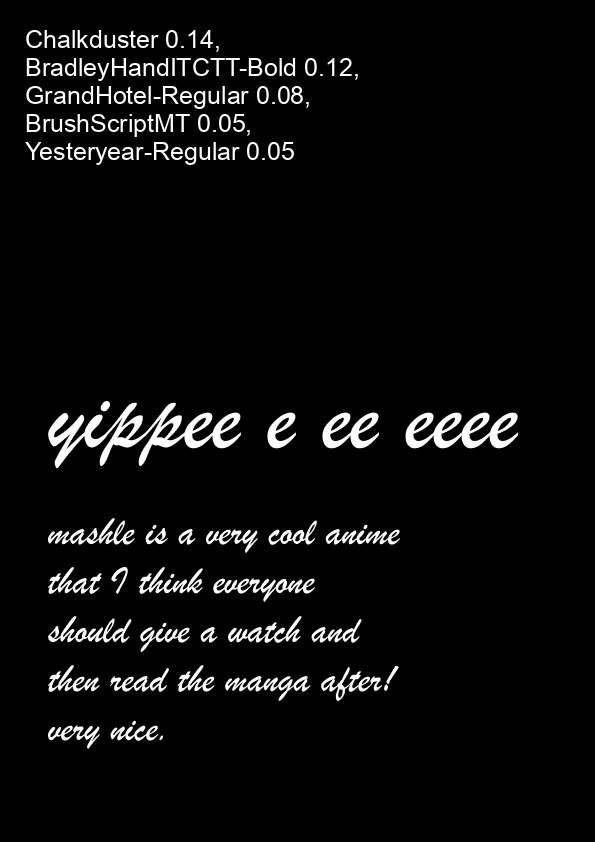

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image
#the results
print('Chalkduster 0.14, BradleyHandITCTT-Bold 0.12, GrandHotel-Regular 0.08, BrushScriptMT 0.05, Yesteryear-Regular 0.05')
Image.open('/content/runs/classify/predict2/BrushscriptMT$$test_2.jpg')

Information for second model: imagesize changed from 640 -> 224

In [ ]:
#metrics for model2
metrics = model2.val()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,122,597 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... found 9441 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... found 2361 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
test: None...


val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... 2361 images, 0 corrupt: 100%|██████████| 2361/2361 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 296/296 [00:07<00:00, 40.27it/s]


                   all      0.952      0.992
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train62


In [ ]:
model2 = YOLO('/content/runs/classify/train6/weights/best.pt')  # load a custom model

# **Text Detection Model**

In [7]:
det_test_dir = '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test'
det_train_dir = '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/train'

In [8]:
# import os
#run it once for making directories

# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/val')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/test')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/train')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/val')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/test')

In [9]:
det_label_dir= "/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels"
det_image_dir="/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images"

In [20]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/*"):
        file_name=os.path.basename(file)

        if file.endswith(".JPG"):
          det_image = (file)
          X.append(det_image)

        if file.endswith(".gt"):
          det_label = (file)
          y.append(det_label)

        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{200} samples',end=' ')
        # print(font_image)
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [21]:
images, labels = load_data()

 Processed 400/200 samples 

In [22]:
images

array(['/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0445.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0461.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0449.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0080.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0103.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0156.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0172.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0059.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0158.JPG',
       '/content/dr

In [23]:
labels

array(['/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0080.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0103.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0156.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0059.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0449.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0461.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0445.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0172.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0462.gt',
       '/content/drive/MyDri

In [24]:
from sklearn.model_selection import train_test_split
# Then further divide the train set into validation
# Note that here, to get 60%-20%, we'll need to divide the 80% train set from above to 75-25 split
# 0.8 * 0.25 = 0.2
X_det_test, X_det_validation, y_det_test, y_det_validation = train_test_split(
    images,
    labels,
    test_size=0.25,
    random_state=42
)

In [25]:
X_det_test

array(['/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1836.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1970.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0156.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1706.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1772.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0820.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1940.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1587.JPG',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1969.JPG',
       '/content/dr

In [26]:
y_det_test

array(['/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1836.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1972.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0461.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1696.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1814.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_0833.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1933.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1626.gt',
       '/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/IMG_1970.gt',
       '/content/drive/MyDri

In [ ]:
import shutil
#run it once for copying!
for file in os.listdir(det_train_dir):
    if file.endswith(".gt"):
        shutil.copy(os.path.join(det_train_dir, file), os.path.join(det_label_dir, "train"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(det_train_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(det_image_dir,"train", new_filename), "JPEG")
        shutil.copy(os.path.join(det_train_dir, file), os.path.join(det_image_dir, "train"))


#Copy gt files and jpg files from the test folder to the folders created.
for file in os.listdir(det_test_dir):
    if file.endswith(".gt"):
        shutil.copy(os.path.join(det_test_dir, file), os.path.join(det_label_dir, "test"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(det_test_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(det_image_dir,"test", new_filename), "JPEG")
        shutil.copy(os.path.join(det_test_dir, file), os.path.join(det_image_dir, "test"))
